Following this tutorial:
https://www.dominodatalab.com/blog/dask-step-by-step-tutorial

In [ ]:
#! pip install dask

In [1]:
from time import sleep
## calculate square of a number

def calculate_square(x):
    sleep(1)
    x= x**2
    return x

## calculate sum of two numbers
def get_sum(a,b):
    sleep(1)
    return a+b

In [2]:
%%time
## call functions sequentially, one after the other

## calculate square of first number
x = calculate_square(10)

## calculate square of second number
y = calculate_square(20)

## calculate sum of two numbers
z = get_sum(x,y)
print(z)

500
CPU times: user 2.64 ms, sys: 996 µs, total: 3.64 ms
Wall time: 3.01 s


In [3]:
## import dask dependencies
import dask
from dask import delayed

In [4]:
%%time
## Wrapping the function calls using dask.delayed
x = delayed(calculate_square)(10)
y = delayed(calculate_square)(20)
z = delayed(get_sum)(x, y)
print(z)

Delayed('get_sum-b12d7eb8-34a5-44bb-8e16-041cef80de65')
CPU times: user 394 µs, sys: 147 µs, total: 541 µs
Wall time: 418 µs


In [9]:
# This definitely works:
#! pip install graphviz
# This one probably not:
#! pip install ipycytoscape

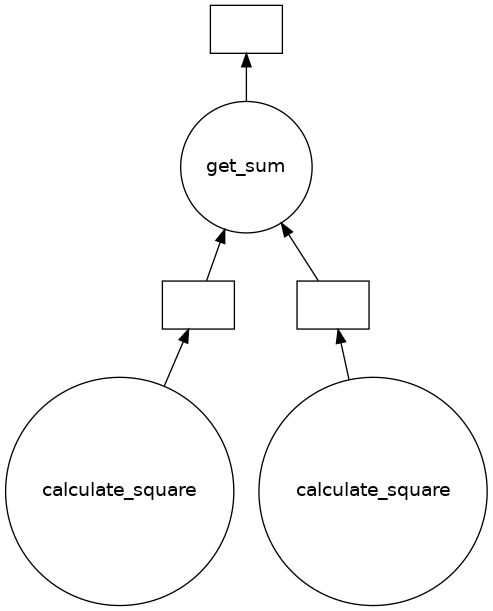

In [8]:
## visualize the task graph
z.visualize()

In [10]:
%%time
## get the result using compute method
z.compute()

CPU times: user 8.51 ms, sys: 221 µs, total: 8.73 ms
Wall time: 2.01 s


500

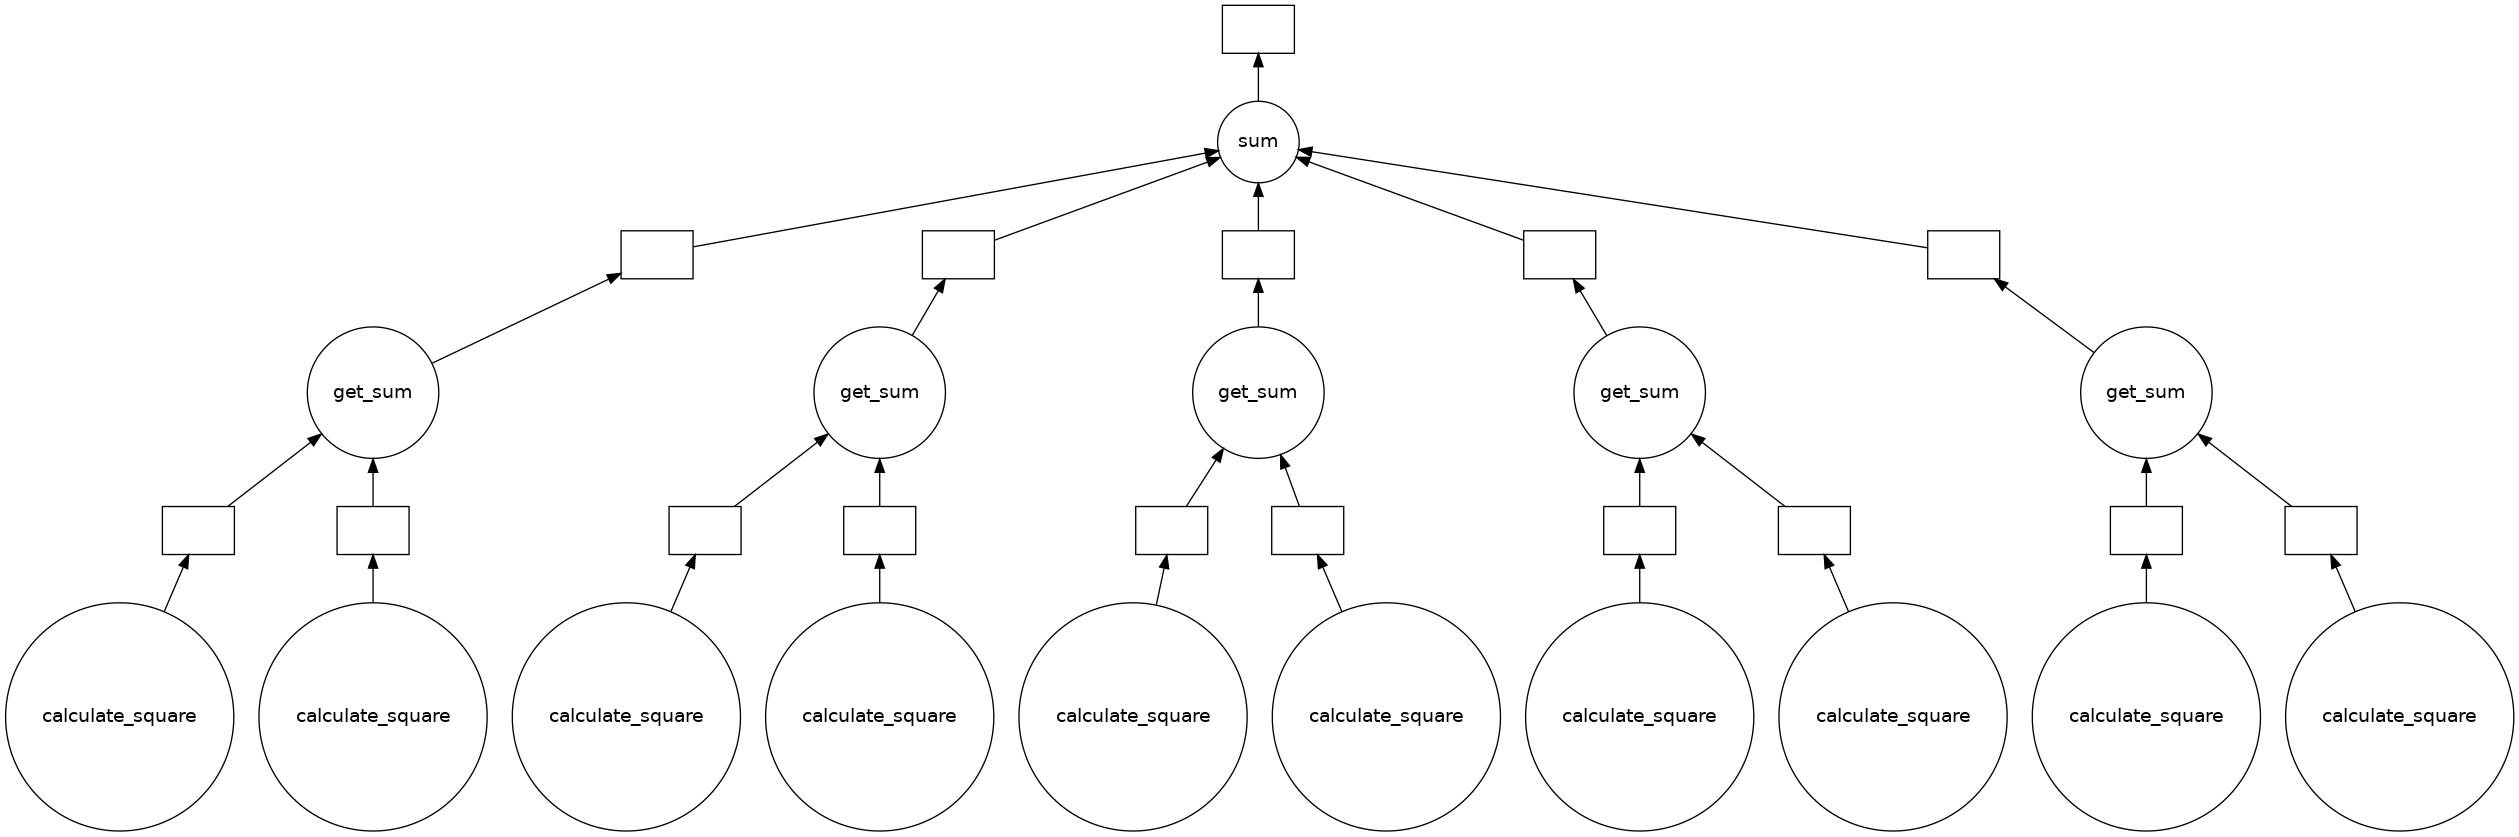

In [20]:
## Call above functions in a for loop
output = []
## iterate over values and calculate the sum
for i in range(5):
    a = delayed(calculate_square)(i)
    b = delayed(calculate_square)(i+10)
    c = delayed(get_sum)(a, b)
    output.append(c)
total = dask.delayed(sum)(output)
## Visualizing the graph
total.visualize()

In [12]:
#! wget https://raw.githubusercontent.com/gouravsinghbais/Time-Series-Forecasting-with-Tensorflow-and-InfluxDB/master/sunspots-dataset/Sunspots.csv

In [13]:
## import dependencies
import pandas as pd
import dask.dataframe as dd

In [13]:
## read the dataframe
pandas_dataframe = pd.read_csv('Sunspots.csv')
dask_dataframe = dd.read_csv('Sunspots.csv')
## calculate mean of a column
print(pandas_dataframe['Monthly Mean Total Sunspot Number'].mean())
print(dask_dataframe['Monthly Mean Total Sunspot Number'].mean().compute())

82.48108191653796
82.48108191653786


In [19]:
%%time
output = []
for i in range(5):
    a = calculate_square(i)
    b = calculate_square(i+10)
    c = get_sum(a, b)
    output.append(c)
sum(output)


CPU times: user 3.59 ms, sys: 1.38 ms, total: 4.98 ms
Wall time: 15.1 s


760

In [21]:
%%time

total.compute()

CPU times: user 3.85 ms, sys: 8.13 ms, total: 12 ms
Wall time: 4.02 s


760